<a href="https://colab.research.google.com/github/rayansyed43/IMAGIFY/blob/main/final_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --quiet diffusers accelerate mediapy transformers better_profanity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.8 MB/s eta 0:00:00


In [ ]:
model = "dreamlike-art/dreamlike-photoreal-2.0"

In [ ]:
from diffusers import EulerAncestralDiscreteScheduler as EAD

scheduler = EAD.from_pretrained(model, subfolder="scheduler")

In [ ]:
from diffusers import StableDiffusionPipeline as sdp

device = "cuda"

pipe = sdp.from_pretrained(
    model,
    scheduler=scheduler
    )

pipe = pipe.to(device)

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
from better_profanity import Profanity

def has_profanity(text):
    return Profanity().contains_profanity(text)

def filter_text(text):
    while has_profanity(text):
        text = input("Please provide an alternative prompt: ")
    return text

In [ ]:
prompt = input("Enter your prompt: ")
filtered_input = filter_text(prompt)
print(filtered_input)

Enter your prompt: man sitting under a tree watching the moon with birds flying around
man sitting under a tree watching the moon with birds flying around


  0%|          | 0/30 [00:00<?, ?it/s]

,,

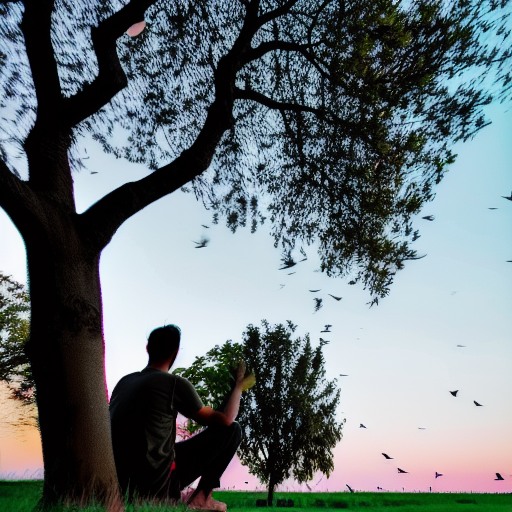
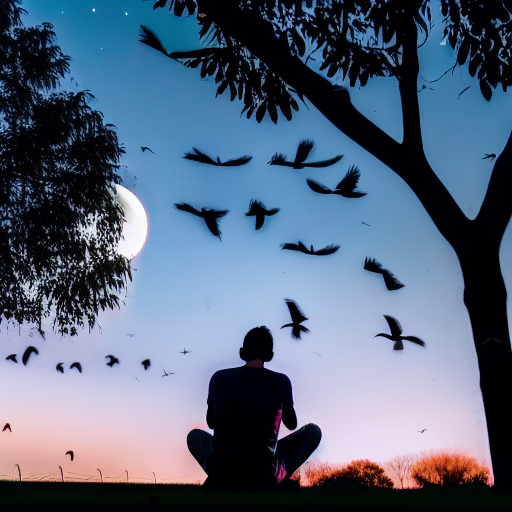
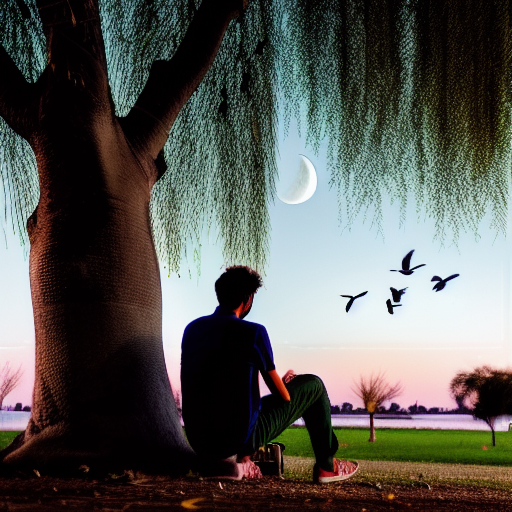

In [ ]:
import mediapy as mp
num_images = 3

images = pipe(
    filtered_input,
    height = 512,
    width = 512,
    num_inference_steps = 30, #more no of steps,  better results
    guidance_scale = 9, #more no of steps,  better results
    num_images_per_prompt = num_images

    ).images

mp.show_images(images)